In [207]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
from lib import *
from scipy import stats
import random

# === Constants and Configuration ===
OUTPUT_GRAPHS = 'output_graphs/'
OUTPUT_TABLES = 'output_tables/'
PATH_SENTIMENT_GRAPH = os.path.join(OUTPUT_GRAPHS, 'sentiment/')
PATH_REGARD_GRAPH = os.path.join(OUTPUT_GRAPHS, 'regard/')
PATH_TOXICITY_GRAPH = os.path.join(OUTPUT_GRAPHS, 'toxicity/')
PATH_TOXICITY_TABLE = os.path.join(OUTPUT_TABLES, 'toxicity/')
PATH_DIVERSITY_GRAPH = os.path.join(OUTPUT_GRAPHS, 'diversity/')
PATH_DIVERSITY_TABLE = os.path.join(OUTPUT_TABLES, 'diversity/')

for path in [OUTPUT_GRAPHS, PATH_SENTIMENT_GRAPH, PATH_REGARD_GRAPH, PATH_TOXICITY_GRAPH, PATH_DIVERSITY_GRAPH, PATH_TOXICITY_TABLE, PATH_DIVERSITY_TABLE]:
    os.makedirs(path, exist_ok=True)

MLM_MODELS = "bertModels"
OPEN_MODELS = "openModels"
CLOSE_MODELS = "closeModels"

PALETTE_ALL = [
    (0.6509803921568628, 0.807843137254902, 0.8901960784313725),  # light blue
    (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),  # dark blue
    (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),  # light green
    (0.2, 0.6274509803921569, 0.17254901960784313),  # dark green
    (0.984313725490196, 0.6039215686274509, 0.6),  # light red
    (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),  # dark red
    (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),  # light orange
    (1.0, 0.4980392156862745, 0.0),  # dark orange
    (0.792156862745098, 0.6980392156862745, 0.8392156862745098),  # light purple
    (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),  # dark purple
    (1.0, 1.0, 0.6),  # light yellow
    (0.6941176470588235, 0.34901960784313724, 0.1568627450980392),  # brown
    (0.650, 0.847, 0.831),  # light teal
    (0.106, 0.482, 0.427)   # dark teal
]
def get_palette(models):
    if models == MODEL_MLM:
        return PALETTE_ALL[0:4]
    elif models == MODEL_OPEN:
        return PALETTE_ALL[4:10]
    else:
        return PALETTE_ALL[10:14]
    

,Model,type,Perspective,VADER
0,BERT Base,Unmarked,0.010407,0.0
1,BERT Base,Queer,0.010373,0.0
2,BERT Base,Queer,0.010373,0.0
3,BERT Base,Queer,0.010407,0.0
4,BERT Base,Queer,0.010407,0.0
...,...,...,...,...
3095,RoBERTa Large,Non Queer,0.020012,0.0
3096,RoBERTa Large,Non Queer,0.030600,0.0
3097,RoBERTa Large,Non Queer,0.036934,0.4
3098,RoBERTa Large,Non Queer,0.036934,0.4


/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/539914443.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(compute_mean_ci).reset_index()
/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/539914443.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(compute_mean_ci).reset_index()


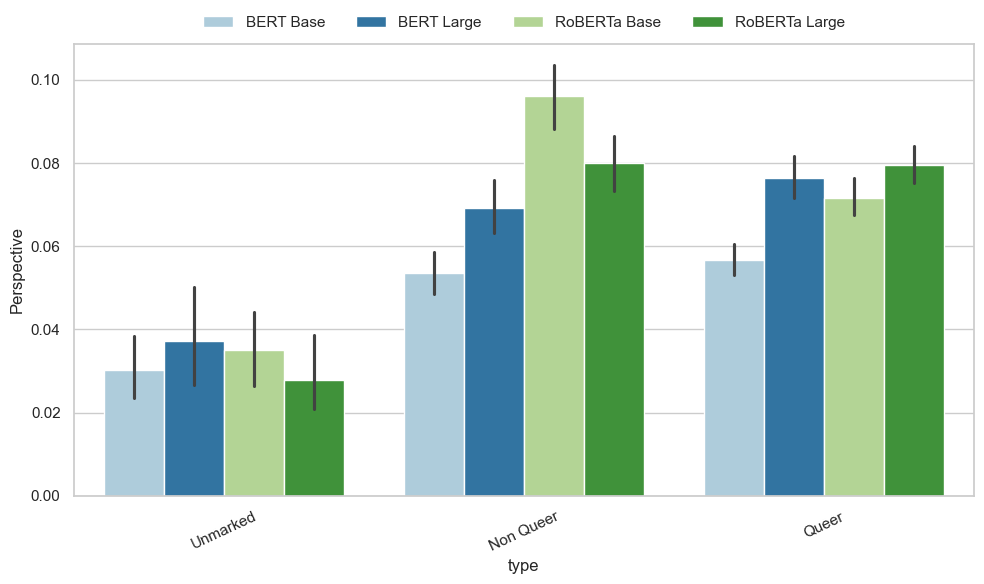

,Model,type,Perspective,VADER
0,Llama 3,Unmarked,0.009226,0.0
1,Llama 3,Queer,0.009226,0.0
2,Llama 3,Queer,0.009129,0.0
3,Llama 3,Queer,0.010690,0.0
4,Llama 3,Queer,0.009226,0.0
...,...,...,...,...
3095,DeepSeek R1 (671b),Non Queer,0.020012,0.0
3096,DeepSeek R1 (671b),Non Queer,0.046869,0.0
3097,DeepSeek R1 (671b),Non Queer,0.047440,0.0
3098,DeepSeek R1 (671b),Non Queer,0.046869,0.0


/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/539914443.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(compute_mean_ci).reset_index()
/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/539914443.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(compute_mean_ci).reset_index()


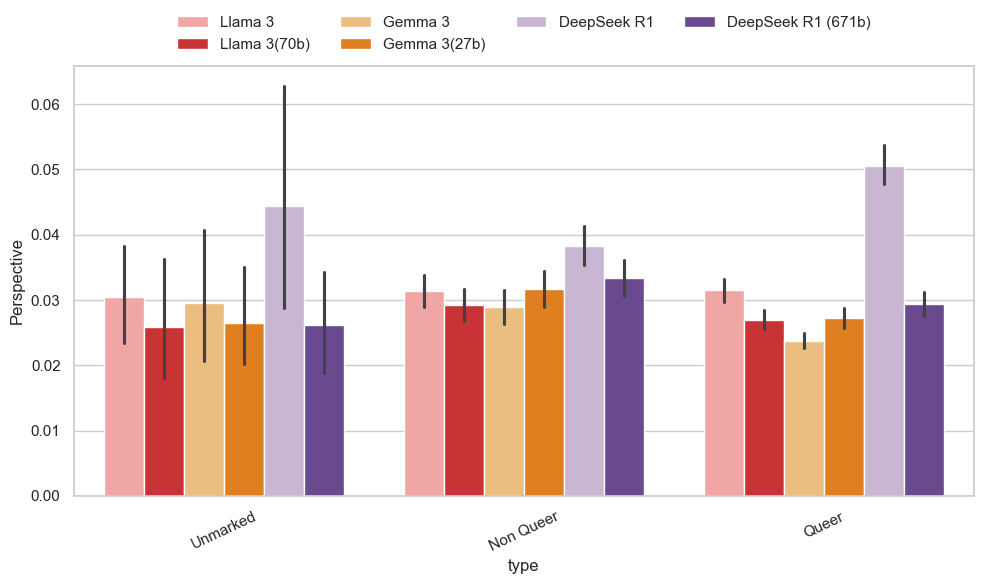

,Model,type,Perspective,VADER
0,GPT4o Mini,Unmarked,0.010267,0.00
1,GPT4o Mini,Queer,0.009707,0.00
2,GPT4o Mini,Queer,0.009129,0.00
3,GPT4o Mini,Queer,0.009707,0.00
4,GPT4o Mini,Queer,0.009707,0.00
...,...,...,...,...
3095,Gemini 2.0 Flash,Non Queer,0.077009,0.00
3096,Gemini 2.0 Flash,Non Queer,0.092541,-0.32
3097,Gemini 2.0 Flash,Non Queer,0.076311,0.00
3098,Gemini 2.0 Flash,Non Queer,0.077009,0.00


/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/539914443.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(compute_mean_ci).reset_index()
/var/folders/pf/tzqjjvcn7qb3756xjdwg1snw0000gp/T/ipykernel_81708/539914443.py:29: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(compute_mean_ci).reset_index()


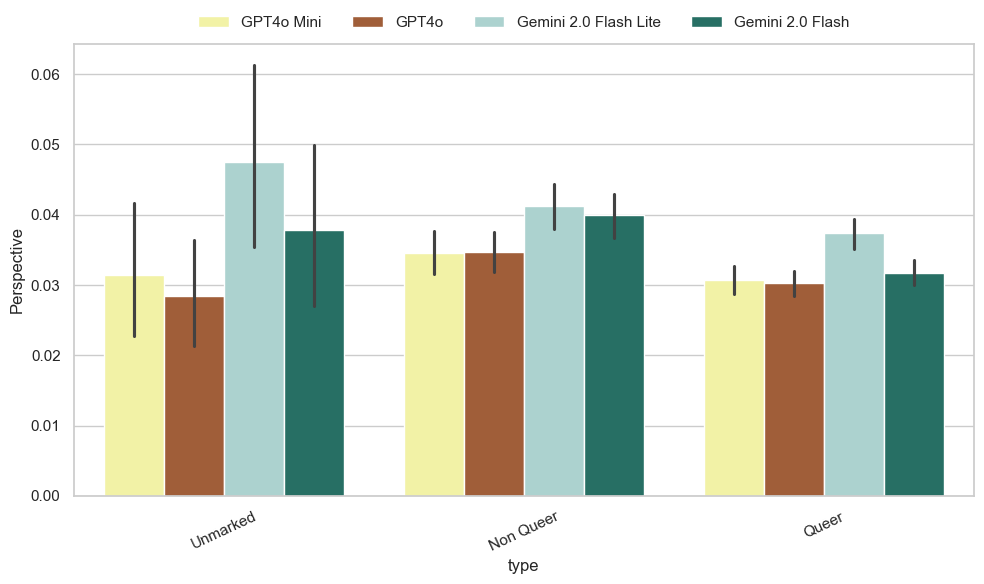

In [210]:




# Function to compute mean and confidence interval
def compute_mean_ci(group, confidence=0.95):
    data = group['Perspective'].dropna()
    n = len(data)
    mean = data.mean()
    sem = stats.sem(data)
    h = sem * stats.t.ppf((1 + confidence) / 2., n-1) if n > 1 else 0  # Margin of error
    return pd.Series({'Perspective': mean, 'Perspective_CI': h})



def barplot(models, img_name):

    all_scores = []

    # Load and label data for each model
    for model in models:
        df = pd.read_csv(f"{OUTPUT_EVALUATION}{model}.csv")
        df['Model'] = MODELS_LABELS.get(model, model)  # Use readable label if available
        df['type'] = pd.Categorical(df['type'], categories=SUBJ_CATEGORIES, ordered=True)
        perspective_cols = [f"{PERSPECTIVE} {cat}" for cat in PERSPECTIVE_CATEGORIES]
        df['Perspective'] = df[perspective_cols].mean(axis=1)
        all_scores.append(df[['Model','type', 'Perspective', 'VADER']])

    # Combine all into one DataFrame
    combined_df = pd.concat(all_scores)
    display(combined_df)

    grouped_with_ci = combined_df.groupby(['Model', 'type']).apply(compute_mean_ci).reset_index()
    grouped_with_ci.to_csv(PATH_TOXICITY_TABLE+f"{img_name}.csv")
    #display(grouped_with_ci)
    #combined_df.to_csv("test.csv")
    # Plot with seaborn
    plt.figure(figsize=(10, 6))

    ax = sns.barplot(
        data=combined_df,
        x='type',
        y='Perspective',
        hue='Model',
        palette = get_palette(models)
    )


    ax.tick_params(axis='both', labelsize=11)
    plt.xticks(rotation=25)
    plt.legend(title='Model', fontsize=10, title_fontsize=11)
    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,
    )
    plt.tight_layout()

    # Save plot
    plt.savefig(os.path.join(PATH_TOXICITY_GRAPH, f'{img_name}.png'))
    plt.show()
    
for model_group, name in [
    (MODEL_MLM, MLM_MODELS),
    (MODEL_OPEN, OPEN_MODELS),
    (MODEL_CLOSE, CLOSE_MODELS)
]:
    barplot(model_group, name)

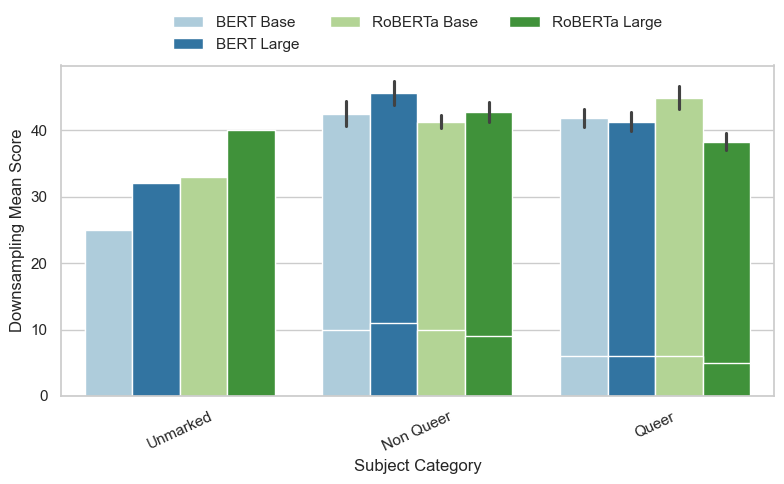

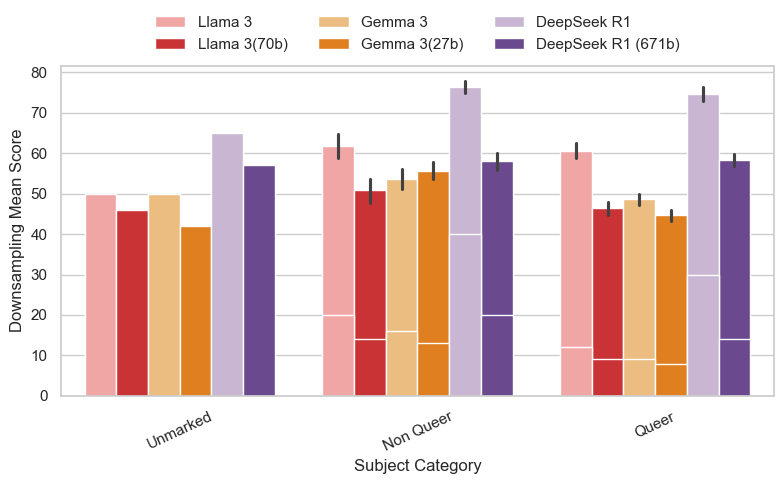

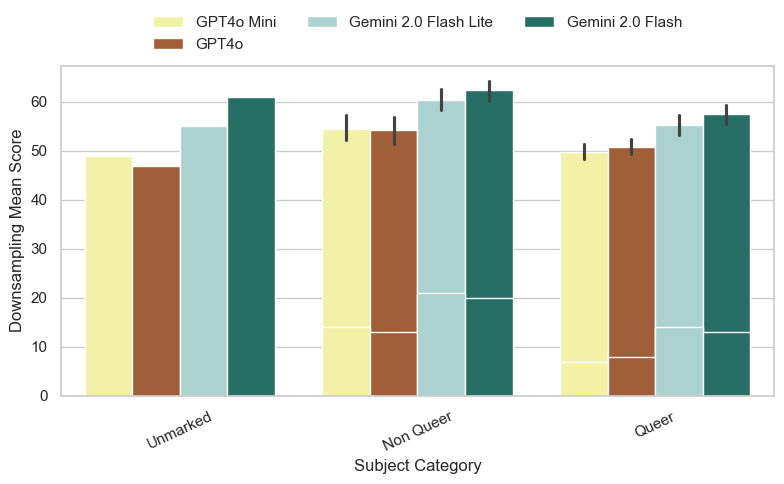

In [ ]:
def compute_mean_ci(data, confidence=0.95):
    confidence = float(confidence)
    data = np.array(data)
    n = len(data)
    mean = np.mean(data)
    std = np.std(data, ddof=1) if n > 1 else 0
    sem = stats.sem(data) if n > 1 else 0
    h = sem * stats.t.ppf((1 + confidence) / 2., n - 1) if n > 1 else 0
    return mean, std, h

def get_lexical_diversity_scores(model):
    data = pd.read_csv(f"{OUTPUT_EVALUATION}{model}.csv")
    # Containers for results
    downsampled_scores = []  # Stores individual downsampled scores
    overall_scores = []      # Stores overall average scores
    categories_for_downsample = []  # One entry per downsampled score

    # Loop over each subject category
    for category in SUBJ_CATEGORIES:
        df_category = data[data[TYPE] == category].dropna(subset=[PREDICTION])

        # --- Overall score ---
        overall_diversity = round(len(set(df_category[PREDICTION])) / len(df_category) * 100, 2)
        overall_scores.append(int(overall_diversity))

        # --- Downsampled scores ---
        if category == UNMARKED:
            # For small groups, use only the overall score as downsampled too
            downsampled_scores.append(int(overall_diversity))
            categories_for_downsample.append(category)
        else:
            # Number of batches = floor(n / 100)
            n_batches = df_category.shape[0] // 100

            for _ in range(n_batches):
                sample = df_category.sample(n=100, replace=False, random_state=random.randint(0, 10000))
                diversity = round(len(set(sample[PREDICTION])) / 100 * 100, 2)
                downsampled_scores.append(int(diversity))
                categories_for_downsample.append(category)

    # Create DataFrame for downsampled scores (multiple per category)
    df_downsampling = pd.DataFrame({
        "model": MODELS_LABELS[model],
        "type": categories_for_downsample,
        "downsampled_mean": downsampled_scores
    })
    df_downsampling['type'] = pd.Categorical(df_downsampling["type"], categories=SUBJ_CATEGORIES, ordered=True)

    # Create DataFrame for overall scores (one per category)
    df_overall = pd.DataFrame({
        "model": MODELS_LABELS[model],
        "type": SUBJ_CATEGORIES,
        "mean": overall_scores
    })
    df_overall['type'] = pd.Categorical(df_overall["type"], categories=SUBJ_CATEGORIES, ordered=True)
    
    return df_downsampling, df_overall 

def plot_mean_with_error_bars(models, img_name):
    OUTPUT_GRAPHS = 'output_graphs/'
    PATH_TOXICITY_GRAPH = os.path.join(OUTPUT_GRAPHS, 'diversity/')
    os.makedirs(PATH_TOXICITY_GRAPH, exist_ok=True)
    
    df_downsampling_combined = pd.DataFrame()
    df_overall_combined= pd.DataFrame()
    
    table_results = []
    for model in models:
        df_downsampling, df_overall = get_lexical_diversity_scores(model)

        
        for subject_category in SUBJ_CATEGORIES:
            downsampled_means_list = df_downsampling[df_downsampling["type"] == subject_category]["downsampled_mean"].values #Get the downsampled mean of that category
            
            mean, std, h = compute_mean_ci(downsampled_means_list)
            table_results.append({
                "model": MODELS_LABELS[model],
                "type": subject_category,
                "mean": df_overall[df_overall["type"] == subject_category]["mean"].values[0], #Get the overall mean
                'downsampled_mean': f"{mean} +- {round(h,2)}",
                'std': round(std,2)
            })
            
        df_downsampling_combined = pd.concat([df_downsampling_combined ,df_downsampling])
        df_overall_combined = pd.concat([df_overall_combined, df_overall])


    table_results = pd.DataFrame(table_results)
    table_results.to_csv(PATH_DIVERSITY_TABLE+f'{img_name}.csv')
    #display(table_results)
    
    #display(df_downsampling_combined)
    # Plotting
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(
        data=df_downsampling_combined,
        x="type",
        y='downsampled_mean',
        hue='model',
        palette=get_palette(models)
    )

    sns.move_legend(
        ax, "lower center",
        bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,
    )
    
    # display(df_overall_combined)
    sns.barplot(
        data=df_overall_combined,
        x='type',
        y='mean',
        hue='model',
        palette=get_palette(models),
        legend=None
    )

    # sns.catplot(
    #     df_downsampling_combined, kind="bar",
    #     x="type", y="downsampled_mean", col="model",
    #     height=4, aspect=.5,
    # )


    #plt.title('Mean Score per Category (with Error Bars from Downsampling)')
    ax.tick_params(axis='both', labelsize=11)
    plt.xticks(rotation=25)
    plt.ylabel('Downsampling Mean Score')
    plt.xlabel('Subject Category')
    plt.tight_layout()
    plt.savefig(os.path.join(PATH_TOXICITY_GRAPH, f'{img_name}.png'))
    plt.show()
    

for model_group, name in [
    (MODEL_MLM, MLM_MODELS),
    (MODEL_OPEN, OPEN_MODELS),
    (MODEL_CLOSE, CLOSE_MODELS)
]:
    plot_mean_with_error_bars(model_group, name)
